<a href="https://colab.research.google.com/github/mohamedghaly1/ECG-Detection-Using-EGRU/blob/main/Exploring%20the%20Dataset/Exploring_the_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Reviewing the data

In [ ]:
train_df = pd.read_csv("/content/gdrive/MyDrive/kaggle_dataset/heartbeat/mitbih_train.csv",header=None)
test_df = pd.read_csv("/content/gdrive/MyDrive/kaggle_dataset/heartbeat/mitbih_test.csv",header=None)
print(train_df[187].value_counts())

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [ ]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
print("For class: N (Normal beat)")
print("  (N) Normal beat")
print("  (L) Left bundle branch block beat")
print("  (R) Right bundle branch block beat")
print("  (e) Atrial escape beat")
print("  (j) Nodal (junctional) escape beat")
print("For class: S (Supraventricular premature beat)")
print("  (S) Supraventricular premature beat")
print("  (A) Atrial premature beat")
print("  (a) Aberrated atrial premature beat")
print("  (J) Nodal (junctional) premature beat")
print("For class: V (Premature ventricular contraction)")
print("  (V) Premature ventricular contraction")
print("  (E) Ventricular escape beat")
print("For class: F (Fusion of ventricular and normal beat)")
print("  (F) Fusion of ventricular and normal beat")
print("For class: Q (Unclassifiable beat or Unkown beat)")
print("  (/) Paced beat")
print("  (Q) Unclassifiable beat")
print("  (f) Fusion of paced and normal beat")

For class: N (Normal beat)
  (N) Normal beat
  (L) Left bundle branch block beat
  (R) Right bundle branch block beat
  (e) Atrial escape beat
  (j) Nodal (junctional) escape beat
For class: S (Supraventricular premature beat)
  (S) Supraventricular premature beat
  (A) Atrial premature beat
  (a) Aberrated atrial premature beat
  (J) Nodal (junctional) premature beat
For class: V (Premature ventricular contraction)
  (V) Premature ventricular contraction
  (E) Ventricular escape beat
For class: F (Fusion of ventricular and normal beat)
  (F) Fusion of ventricular and normal beat
For class: Q (Unclassifiable beat or Unkown beat)
  (/) Paced beat
  (Q) Unclassifiable beat
  (f) Fusion of paced and normal beat


In [ ]:
Targets = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
Targets

{0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}

In [ ]:
train_df.head()
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Discussing the various types of arrhythmias found in the dataset.

## Plot 3 different ECG beats of the normal beat class

**Normal beats are known as the normal cardiac electrical activity that starts in the sinuatrial (SA) node. In general, p-wave morphology can slightly change from one person to another, but it is usually straightened and uniform. Meanwhile, typical ECG waveforms in normal beats consist of atrial depolarization represented by p wave, ventricular depolarization represented by QRS complex and ventricular repolarization represented by T wave.**

**The normal PR interval generally is 0.12 to 0.20 seconds, i.e., the period from the beginning of the P wave to the beginning of the QRS complex. The QRS complex duration is mostly narrow (≤0.12 seconds). The T waves are usually taller and follow QRS with a small time lag.**

In [ ]:
normal_data = train_df[train_df[187] == 0].sample(3)

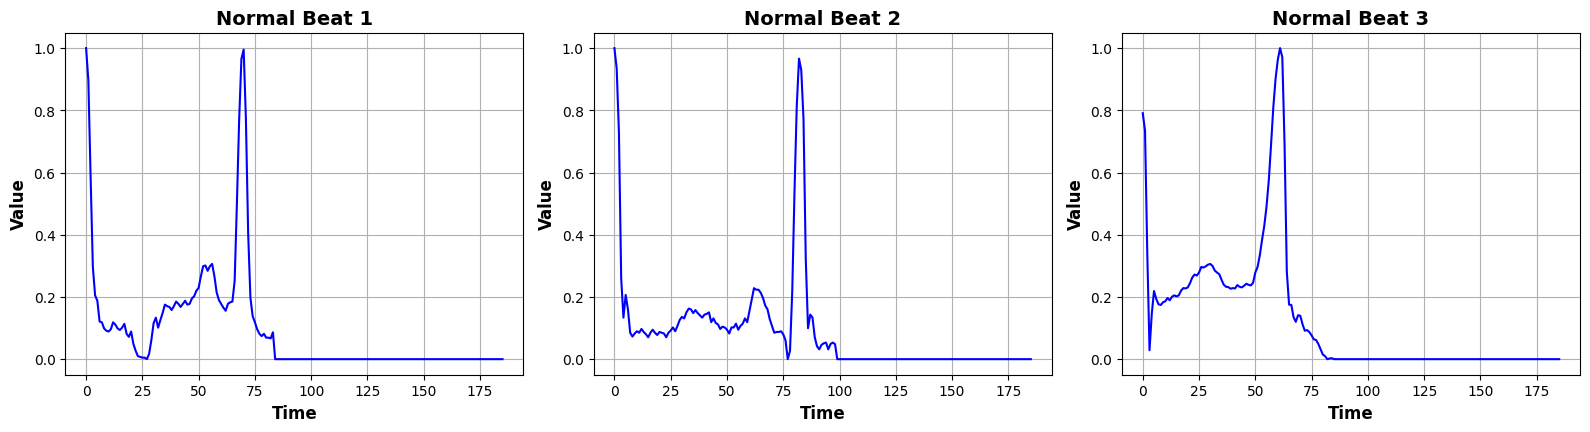

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(3):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(data=normal_data.iloc[i, :186], color='blue')
    plt.title('Normal Beat {}'.format(i + 1), fontsize=14, fontweight='bold')

    # Set labels and ticks
    plt.xlabel('Time', fontsize=12, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Plot 3 different ECG beats of the Supraventricular ectopic beat class

**Supraventricular beats often originate from the atria and go up over the ventricles, though they may also include atrioventricular nodal (AV nodal) reentrant tachycardia or atrial fibrillation. P-wave morphology could be different from the normal beats it peaks at, that is, there could also be notched or inverted ones. Depending on which exact supraventricular arrhythmia it is being applied to this period PR may be within the normal range or slightly extended.The QRS duration is usually normal if conduction is normal and there is no pre-excitation. T waves can be affected by prior atrial activity; however, they usually track the QRS complex.**

In [ ]:
supraventricular_data = train_df[train_df[187] == 1].sample(3)

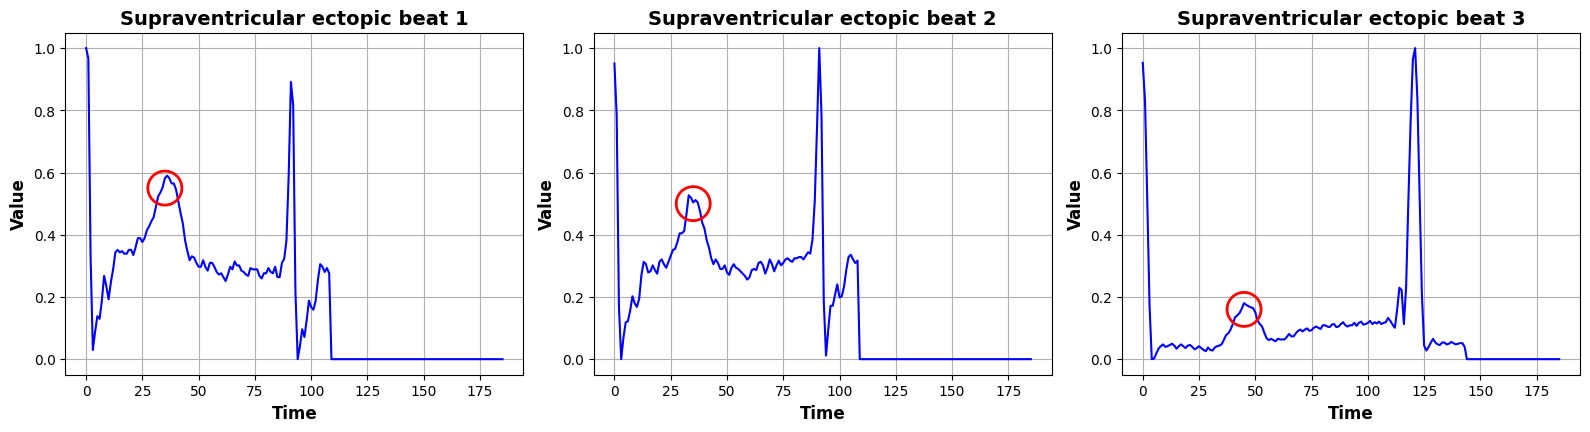

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(3):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(data=supraventricular_data.iloc[i, :186], color='blue')
    plt.title('Supraventricular ectopic beat {}'.format(i + 1), fontsize=14, fontweight='bold')

    # Set labels and ticks
    plt.xlabel('Time', fontsize=12, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    if(i==0): j=0.55; k=35
    elif(i==1): j=0.5; k=35
    else: j= 0.16; k=45
    plt.scatter(x=[k], y=[j], s=600, facecolors='none', edgecolor='red', marker='o', linewidth=2, zorder=3)

plt.tight_layout()
plt.show()

## Plot 3 different ECG beats of the Ventricular ectopic beats class

**Ventricular premature beats appear from the ventricles and they are a result of abnormal depolarization. An abnormal depolarization of the ventricles is typically portrayed by a wide and bizarre QRS complex morphology. Ventricular premature beats usually do not show up with P waves preceding them, except they are fusion beats.In a purely ventricular beat, there is no PR interval. Changes in T waves like inversion or discordance from the QRS complex may occur due to changed ventricular repolarization.**

In [ ]:
ventricular_data = train_df[train_df[187] == 2].sample(3)

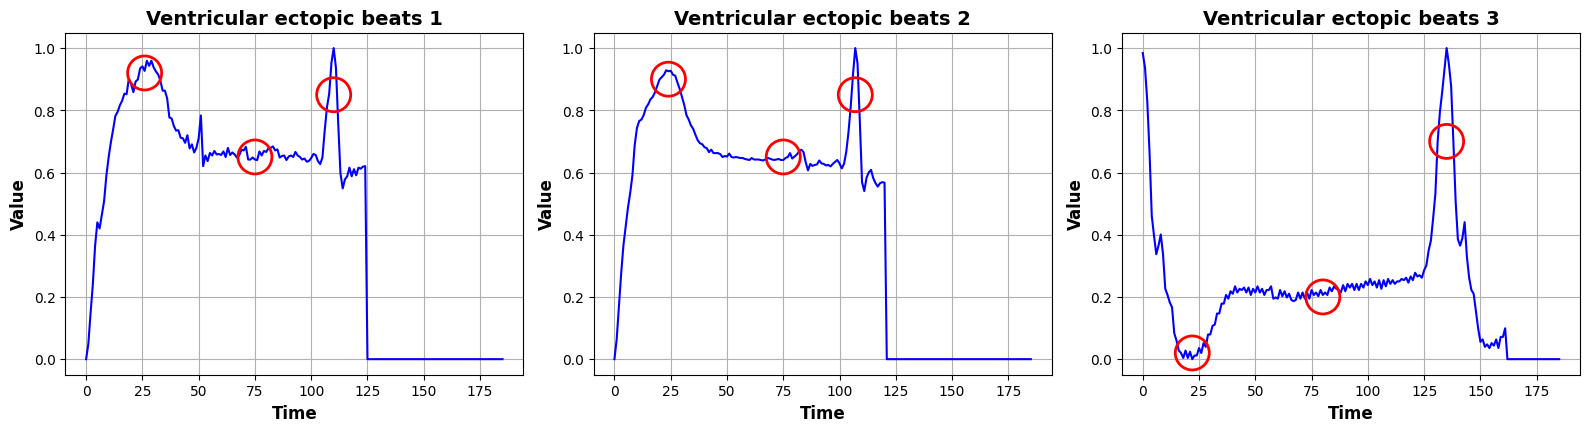

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(3):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(data=ventricular_data.iloc[i, :186], color='blue')
    plt.title('Ventricular ectopic beats {}'.format(i + 1), fontsize=14, fontweight='bold')

    # Set labels and ticks
    plt.xlabel('Time', fontsize=12, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    if(i==0): j=0.85; k=110; m=75;n=0.65;o=26;p=0.92
    elif(i==1): j=0.85; k=107;m=75;n=0.65;o=24;p=0.9
    else: j= 0.7; k=135;m=80;n=0.2;o=22;p=0.02
    plt.scatter(x=[k], y=[j], s=600, facecolors='none', edgecolor='red', marker='o', linewidth=2, zorder=3)
    plt.scatter(x=[m], y=[n], s=600, facecolors='none', edgecolor='red', marker='o', linewidth=2, zorder=3)
    plt.scatter(x=[o], y=[p], s=600, facecolors='none', edgecolor='red', marker='o', linewidth=2, zorder=3)

plt.tight_layout()
plt.show()

## Plot 3 different ECG beats of the Fusion Beats class

**Fusion beats are what occur when a regular beat and an irregular beat coincide, producing a mixed signal. With its shape, size,and duration, the QRS complex, which is representative of ventricular activity, may appear as a blend of regular and irregular beats.Most of the time an atrial P wave might get mixed up with the QRS complex. This makes it impossible for one to determine the PR interval which is defined as the duration elapsed from the onset of a P wave till the start of a QRS complex given the simultaneous occurrence of both atrial and ventricular events. In addition to this the T waves denoting ventricular recovery are also subject to change according to the extent of overlap between normal and abnormal activities of the heart.**

In [ ]:
fusion_data = train_df[train_df[187] == 3].sample(3)

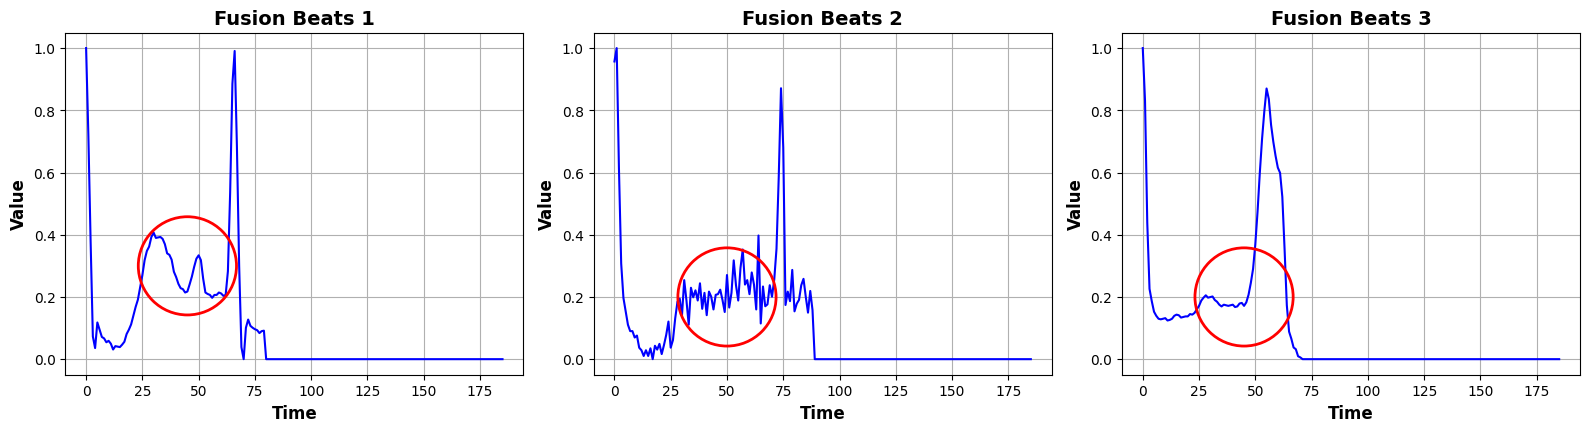

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(3):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(data=fusion_data.iloc[i, :186], color='blue')
    plt.title('Fusion Beats {}'.format(i + 1), fontsize=14, fontweight='bold')

    # Set labels and ticks
    plt.xlabel('Time', fontsize=12, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    if(i==0): j=0.3; k=45
    elif(i==1): j=0.2; k=50
    else: j= 0.2; k=45
    plt.scatter(x=[k], y=[j], s=5000, facecolors='none', edgecolor='red', marker='o', linewidth=2, zorder=3)

plt.tight_layout()
plt.show()

## Plot 3 different ECG beats of the unknown Beats class

**Unidentified beats are those which the classification system isn’t sufficiently sure about to place in a particular category. This is likely due to strange patterns in the heart’s electrical signals that are different from those typically seen. Another potential reason is that there was interference during measurement, signal corruption or abnormal heart functioning. Such beats require more in-depth analysis by a physician or detailed interpretation methods for learning exactly what’s happening and improving their classification.**

In [ ]:
unknown_data = train_df[train_df[187] == 4].sample(3)

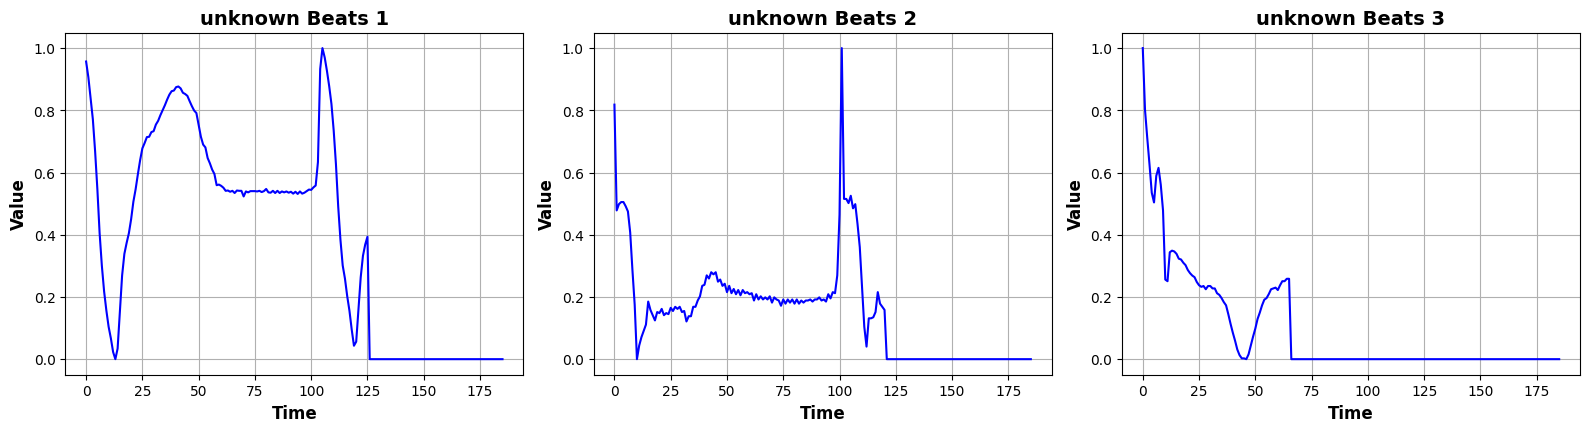

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(3):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(data=unknown_data.iloc[i, :186], color='blue')
    plt.title('unknown Beats {}'.format(i + 1), fontsize=14, fontweight='bold')

    # Set labels and ticks
    plt.xlabel('Time', fontsize=12, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Plotting all classes

In [ ]:
classes=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

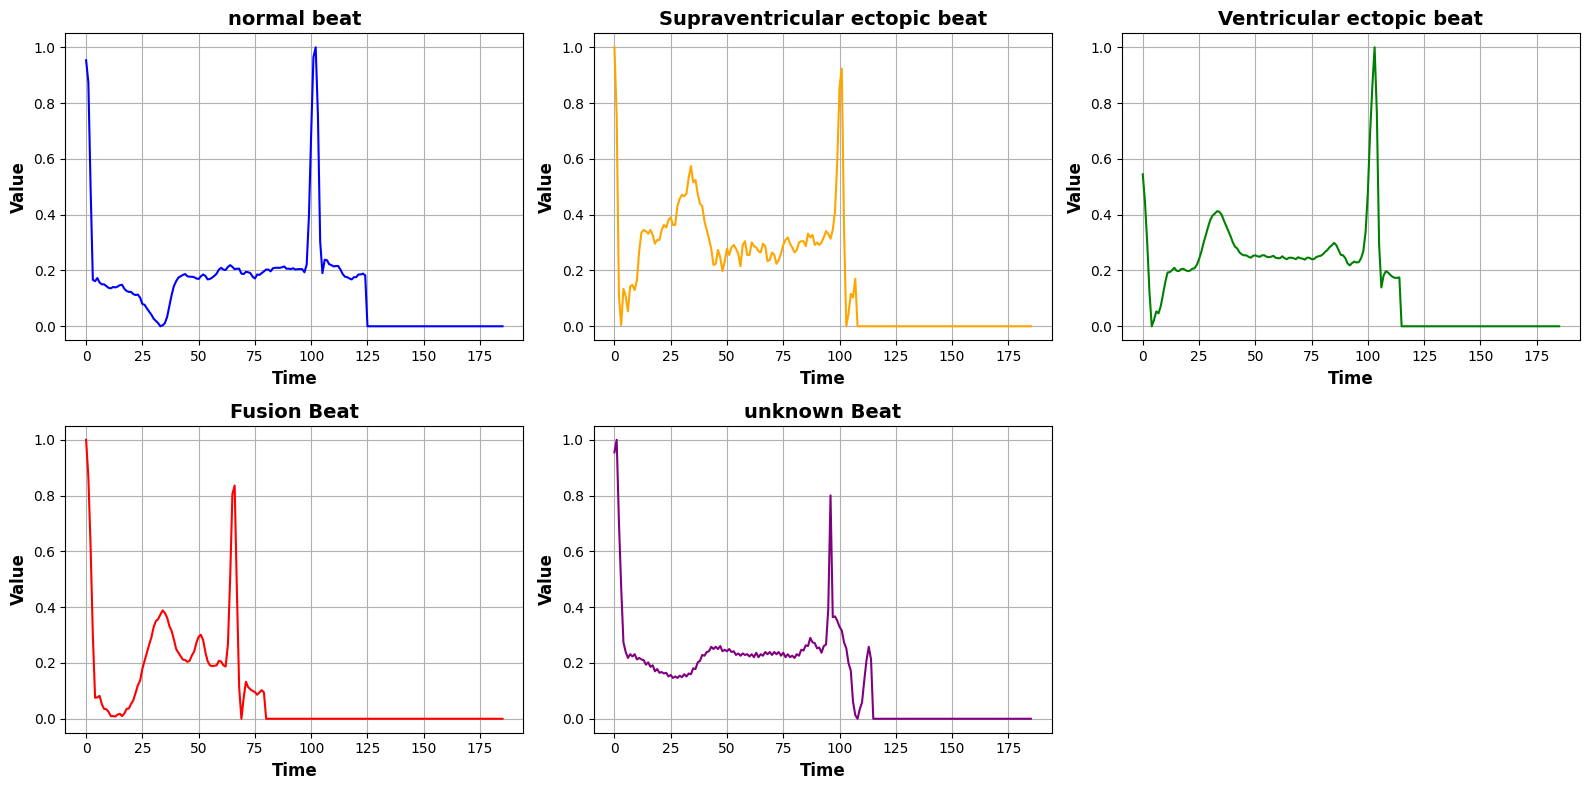

In [ ]:
# Define custom colors for each class
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(16, 8))

class_labels = ['normal beat', 'Supraventricular ectopic beat', 'Ventricular ectopic beat',
                'Fusion Beat','unknown Beat']

for i, label in enumerate(class_labels, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(data=classes.iloc[i-1, :186], color=colors[i-1])
    plt.title(label, fontsize=14, fontweight='bold')

    # Set labels and ticks
    plt.xlabel('Time', fontsize=12, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Resampling

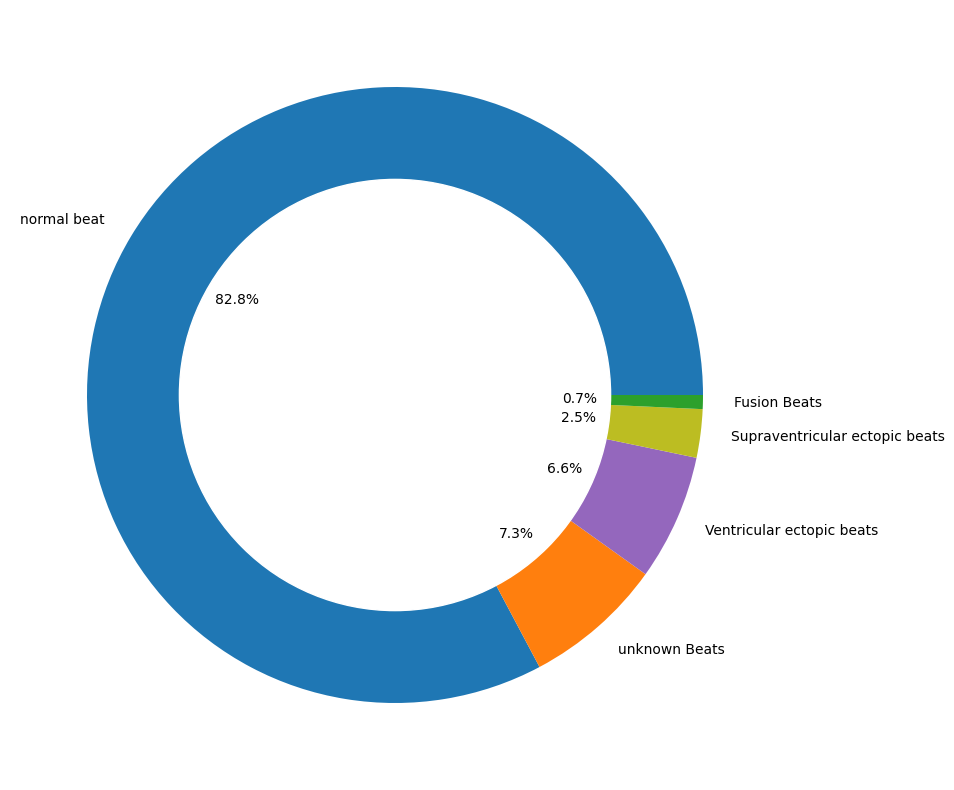

In [ ]:
per_class = train_df[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
# Separate features and target variable
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenate the resampled data
train_df = pd.DataFrame(X_resampled)
train_df[187] = y_resampled

per_class = train_df[187].value_counts()
plt.figure(figsize=(20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat', 'unknown Beats', 'Ventricular ectopic beats', 'Supraventricular ectopic beats', 'Fusion Beats'], colors=['tab:blue', 'tab:orange', 'tab:purple', 'tab:olive', 'tab:green'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
print(train_df[187].value_counts())